In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("Chp3.xlsx", sheet_name="Sheet1")
#loads data into panda data frame

In [7]:
df.head(5)
#displays first x rows

,AircraftNo,ModelCode,CharterID,CharterDate,Pilot,Copilot,Destination,Distance,Hours,Delay,Gallons,Quarts,CustCode,Manufacturer
0,2778V,PA31-350,10231,2018-04-04,109,NaN,ATL,1011,5.5,3.6,243.6,1,10011,Piper
1,2289L,C-90A,9685,2016-01-26,109,NaN,MOB,895,4.6,0.0,302.9,0,10011,Beechcraft
2,4278Y,PA31-350,9582,2015-08-21,109,NaN,MOB,842,4.4,6.1,187.9,1,10010,Piper
3,1484P,PA23-250,9856,2016-09-16,101,NaN,BNA,352,1.9,5.3,NaN,1,10012,Piper
4,2778V,PA31-350,9476,2015-03-18,106,101.0,TYS,668,4.2,3.8,153,0,10019,Piper


In [23]:
df['Gallons'] = pd.to_numeric(df['Gallons'], errors='coerce')
#converts gallons to floats, any errors it sets to NaNs

In [27]:
df.drop(df[(df["Gallons"] < 0.00) | (df["Gallons"]>99999)].index , inplace = True) 
print (len(df))

979


In [36]:
df.drop_duplicates(keep=False, subset = ['CharterID'], inplace = True) 
print (len(df))
#drops any gallons less than 0 or above 99999, inplace makes the changes to df
nd = df.dropna(subset=['Gallons'])
#drops all the rows with NaN values

741


In [25]:
writer = pd.ExcelWriter('output.xlsx', date_format = 'dd-mmm-yy', datetime_format='dd-mmm-yy')
nd.to_excel(writer, sheet_name='Sheet1')
writer.save()
#outputs to excel

In [26]:
colAircraft = ["AircraftNo" , nd['AircraftNo'].nunique()]
print ("Amount of unique aircraft numbers : " + str(colAircraft[1]))
colManufacturer = ["Manufacturer" , nd['Manufacturer'].nunique()]
print ("Amount of unique Manufacturers : " + str(colManufacturer[1]))
colModelCode = ["ModelCode" , nd['ModelCode'].nunique()]
print ("Amount of unique ModelCodes is : " + str(colModelCode[1]))
arr = [colAircraft, colManufacturer, colModelCode]
sortedArr = sorted(arr,key=lambda x: x[1])
#simply sorts the array based on the 2dimension, ie the unique count

Amount of unique aircraft numbers : 4
Amount of unique Manufacturers : 2
Amount of unique ModelCodes is : 3


In [18]:
print ("Concept hierarchy is as follows : ")
print (sortedArr[0])
print("------v-----")
print(sortedArr[1])
print("------v-----")
print(sortedArr[2])

Concept hierarchy is as follows : 
['Manufacturer', 2]
------v-----
['ModelCode', 3]
------v-----
['AircraftNo', 4]


In [19]:
print (nd['Gallons'].max())
print (nd['Gallons'].max()/30)      

575.7
19.19


0 30 60 90 120 150 180 210 240 270 300 330 360 390 420 450 480 510 540 570 600


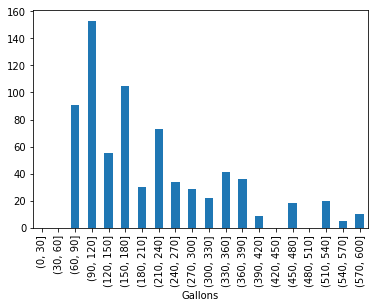

In [44]:
bin = []
for x in range (0, int((nd['Gallons'].max())/30)+2):
    bin.append(x*30)
print (*bin)
s = nd.groupby(pd.cut(nd['Gallons'], bins=bin)).size()
s.plot.bar()

In [62]:
print (str(bin[0] + " <------------------> " + str(bin[-1]))

In [64]:
var = []
for x in range(0, int(len(bin)) , 4):
    str = []
    str.append(bin[x])
    var.append(str)
print (*var)

[0] [120] [240] [360] [480] [600]
